Top 10 features by Chi2: ['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Top 10 features by RFE: ['sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


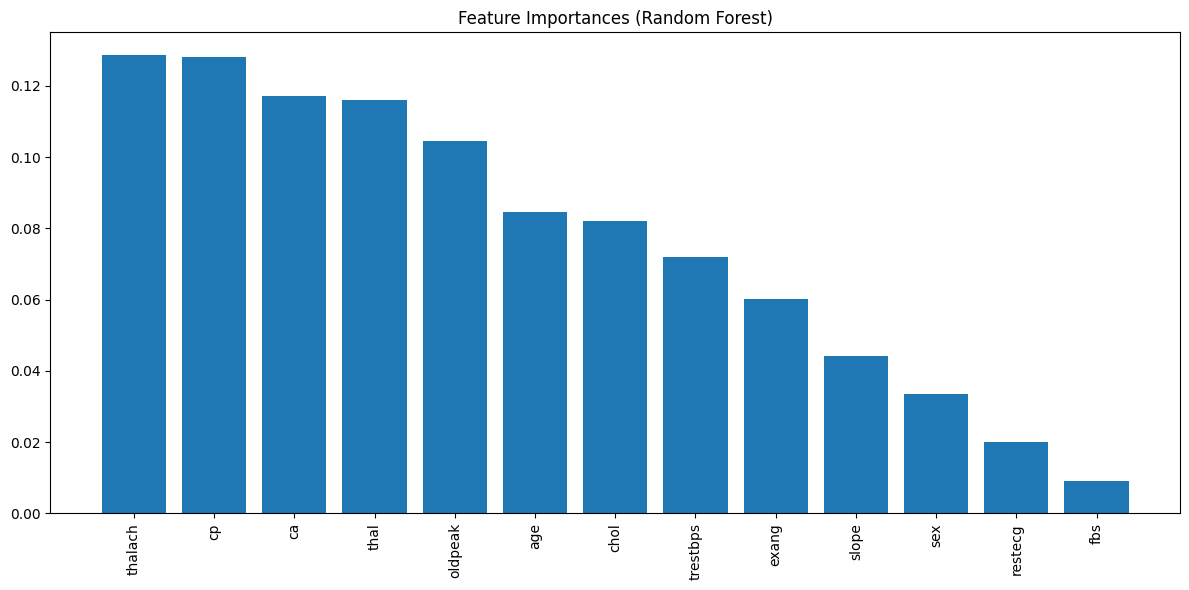

In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
df = pd.read_csv('../data/heart_disease_clean.csv')
X = df.drop('num', axis=1)
y = df['num']

# 2. Chi2 Selection (requires non-negative values)
scaler = MinMaxScaler()
X_chi2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
chi_selector = SelectKBest(score_func=chi2, k=10)
X_chi = chi_selector.fit_transform(X_chi2, y)
chi_cols = X.columns[chi_selector.get_support()]
print("Top 10 features by Chi2:", list(chi_cols))

# 3. RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
rfe_cols = X.columns[rfe.support_]
print("Top 10 features by RFE:", list(rfe_cols))

# 4. Random Forest feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()